In [235]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft
import librosa as lib

In [236]:
#Abrir audio en formato wav (Voz en Aula Magna)
sig, fs = lib.load('aula-magna/voice-near.wav') 

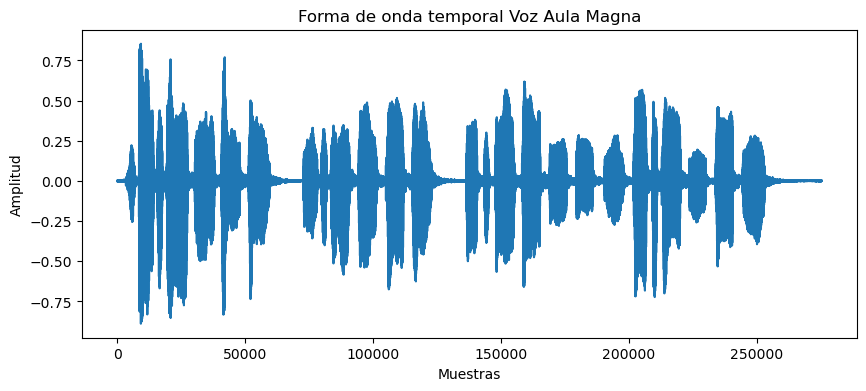

In [237]:
#Plantear la forma de onda temporal
plt.figure(figsize=(10, 4))
plt.plot(sig)
plt.title('Forma de onda temporal Voz Aula Magna')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

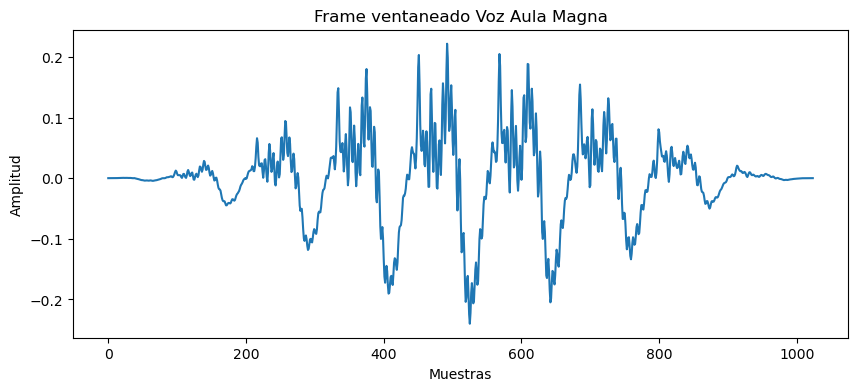

In [238]:
#Ventanear la señal de audio
def ventanas(x, len_f, overlap):
    x = x.tolist()
    num_f = int(round(len(x) / (len_f - (len_f * overlap))))
    matriz_frames = []
    for i in range(num_f):
        frame = x[int(i * round(len_f * overlap)):int(i * round(len_f * overlap)) + len_f]
        while len(frame) < len_f:
            frame.append(0)
        matriz_frames.append(frame)
    matf = np.array(matriz_frames)
    return matf

len_f = 1024
overlap = 0.5
sig_frames = ventanas(sig, len_f, overlap)

# Aplicar ventana 
ventana = signal.windows.hann(len_f)
sig_frames_ventana = sig_frames * ventana

# Graficar algunos frames ventaneado
plt.figure(figsize=(10, 4))
plt.plot(sig_frames_ventana[10])
plt.title('Frame ventaneado Voz Aula Magna')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


In [239]:
# Aplicar FFT a todos los frames
sigfft_frames = np.apply_along_axis(fft, 1, sig_frames_ventana)
magsigfft_frames = np.abs(sigfft_frames)


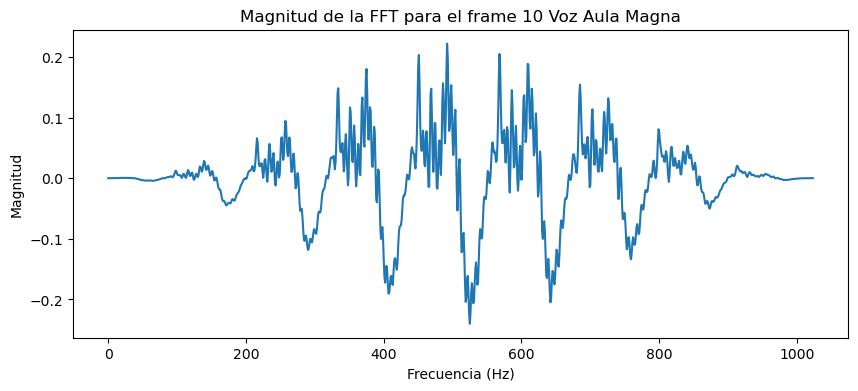

In [240]:
# Graficar la magnitud de la FFT para uno de los frames
plt.figure(figsize=(10, 4))
plt.plot(sig_frames_ventana[10])
plt.title('Magnitud de la FFT para el frame 10 Voz Aula Magna')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.show()


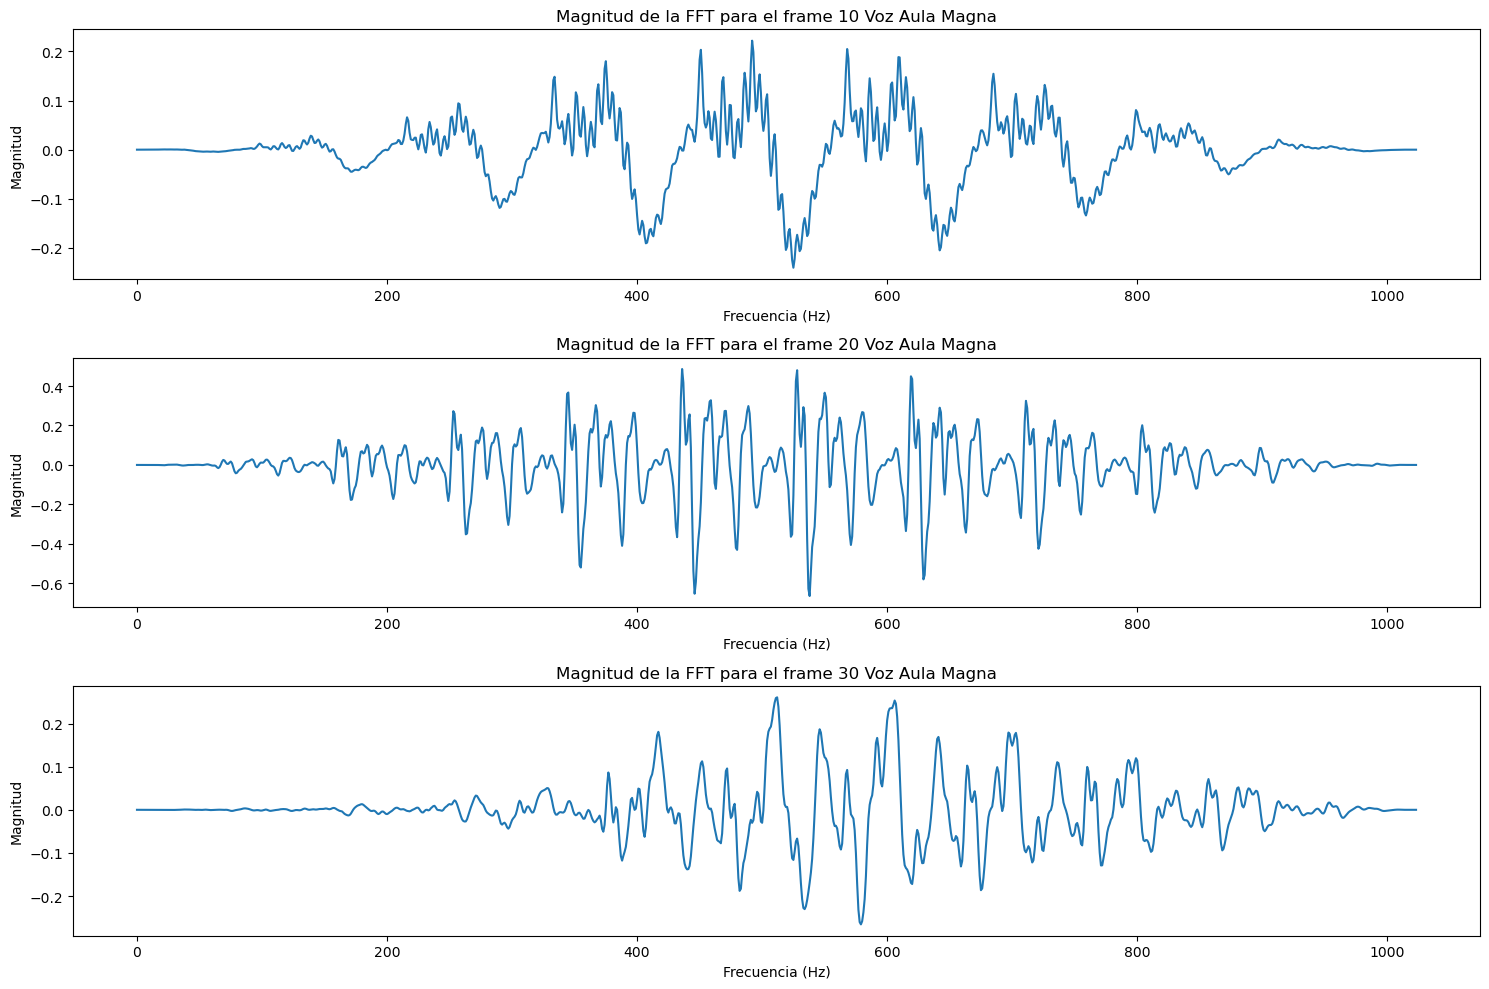

In [241]:
# Seleccionar algunos frames para graficar
frames_to_plot = [10, 20, 30]

plt.figure(figsize=(15, 10))

for i, frame in enumerate(frames_to_plot):
    plt.subplot(len(frames_to_plot), 1, i+1)
    plt.plot(sig_frames_ventana[frame])
    plt.title(f'Magnitud de la FFT para el frame {frame} Voz Aula Magna')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')

plt.tight_layout()
plt.show()


In [242]:
#Seleccionar 3 tipos de audios: Biofono (Cuervo), Antropofono (Voz comediante en Festival de Viña [aislada]) y Geofono (Viento)

# Rutas de los archivos de audio
ruta_biofono = 'audios-tarea3/crowsnorm.wav'
ruta_geofono = 'audios-tarea3/viento.wav'

In [243]:
#Nuevo audio Antropofono debido a que ya se analizo uno previamente que pertenecia a una voz en el Aula Magna

#Cargar audio para tener referencia auditiva
from IPython.display import Audio

In [244]:
fs = 48000
seg=5

sig1, fs1 = lib.load('audios-tarea3/mr.noctulo.wav', sr=fs, duration=seg) 

In [245]:
Audio(data=sig1, rate=fs)

In [246]:
#Por lo tanto nuestra ruta del archivo de audio es el siguiente
ruta_antropofono = 'audios-tarea3/mr.noctulo.wav'

In [247]:
# Cargar audios
biofono, fs = lib.load(ruta_biofono)
antropofono, fs = lib.load(ruta_antropofono)
geofono, fs = lib.load(ruta_geofono)


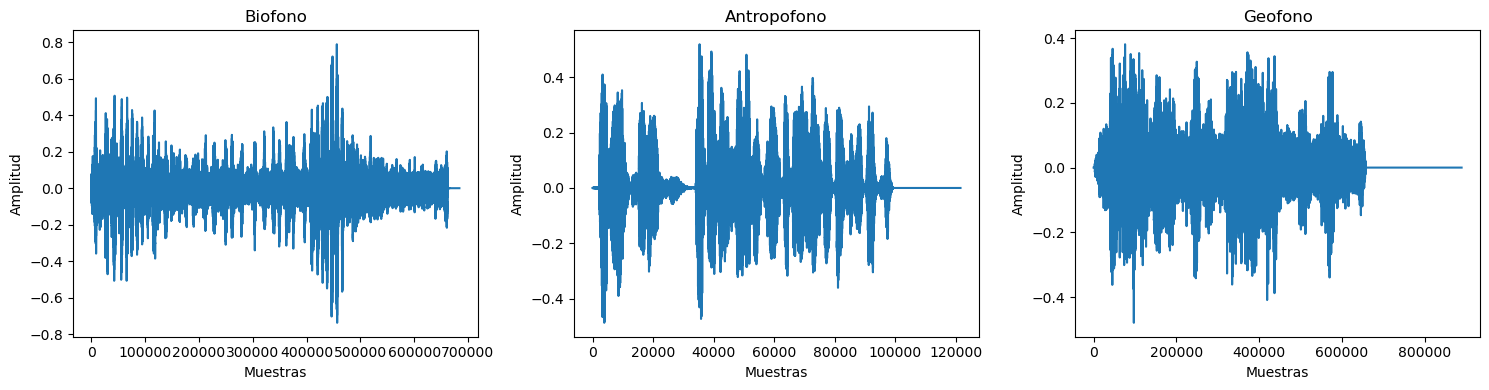

In [248]:
# Graficar forma de onda de cada audio
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(biofono)
plt.title('Biofono')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(1, 3, 2)
plt.plot(antropofono)
plt.title('Antropofono')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(1, 3, 3)
plt.plot(geofono)
plt.title('Geofono')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

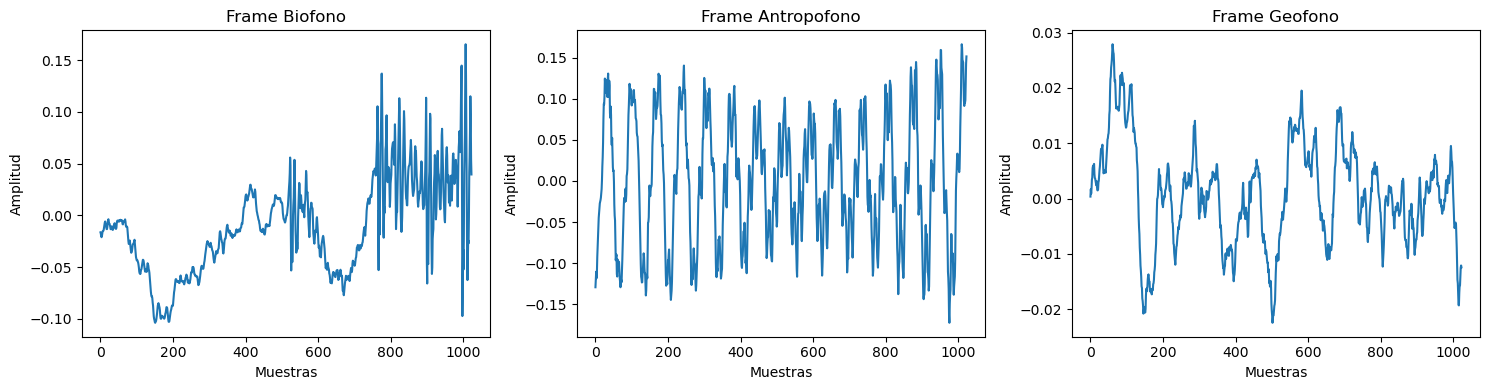

In [249]:
# Seleccionar algunos frames de cada audio

bio_frames = ventanas(biofono, len_f, overlap)
antro_frames = ventanas(antropofono, len_f, overlap)
geo_frames = ventanas(geofono, len_f, overlap)

# Graficar un frame interesante de cada tipo de audio
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(bio_frames[10])
plt.title('Frame Biofono')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(1, 3, 2)
plt.plot(antro_frames[10])
plt.title('Frame Antropofono')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(1, 3, 3)
plt.plot(geo_frames[10])
plt.title('Frame Geofono')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()


In [250]:
# Aplicar FFT a todos los frames del audio Biofono
bio_frames_ventana = bio_frames * ventana
biofft_frames = np.apply_along_axis(fft, 1, bio_frames_ventana)
biofft_frames = np.abs(biofft_frames)

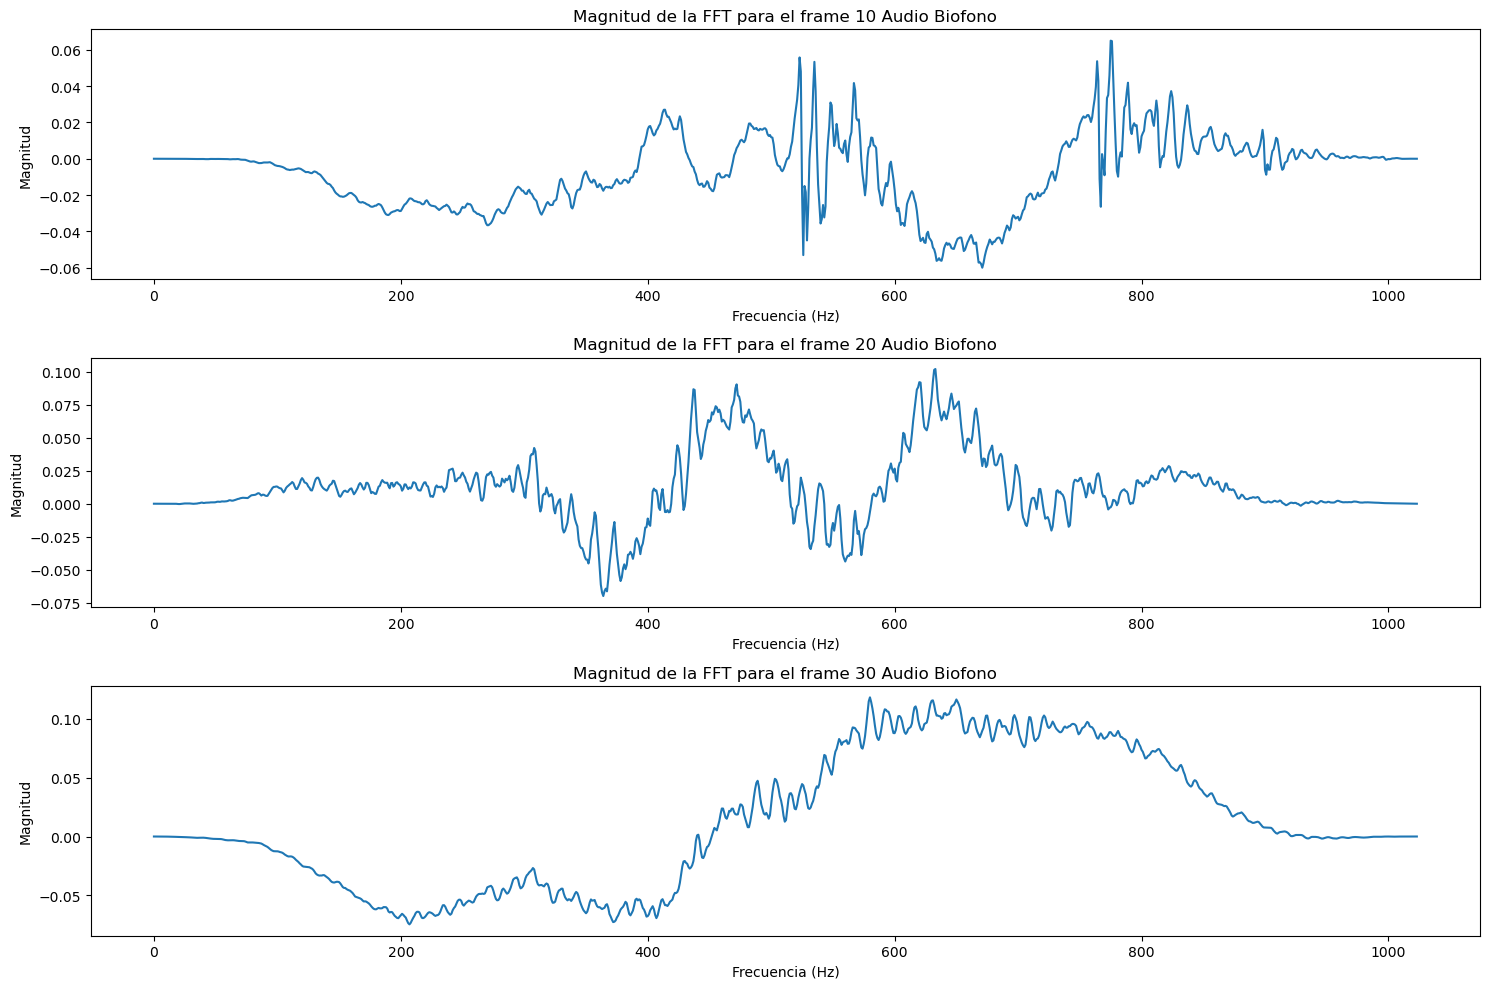

In [251]:
# Seleccionar algunos frames para graficar
frames_to_plot = [10, 20, 30]

plt.figure(figsize=(15, 10))

for i, frame in enumerate(frames_to_plot):
    plt.subplot(len(frames_to_plot), 1, i+1)
    plt.plot(bio_frames_ventana[frame])
    plt.title(f'Magnitud de la FFT para el frame {frame} Audio Biofono')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')

plt.tight_layout()
plt.show()

In [252]:
# Aplicar FFT a todos los frames del audio Antropofono
antro_frames_ventana = antro_frames * ventana
antrofft_frames = np.apply_along_axis(fft, 1, antro_frames_ventana)
antrofft_frames = np.abs(antrofft_frames)

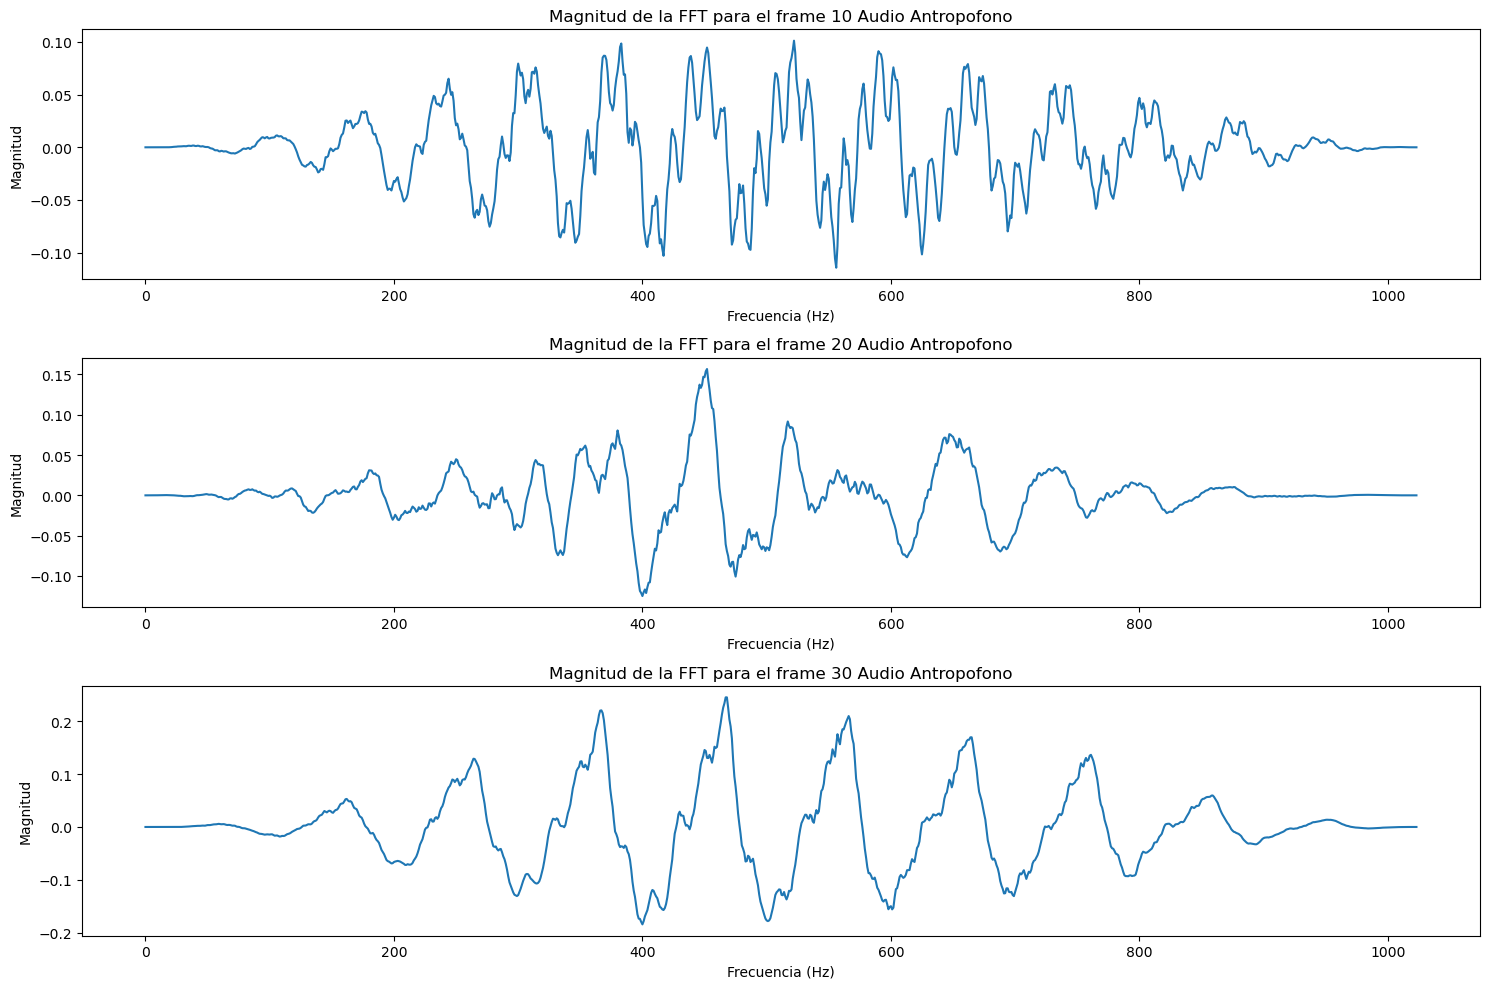

In [253]:
# Seleccionar algunos frames para graficar
frames_to_plot = [10, 20, 30]

plt.figure(figsize=(15, 10))

for i, frame in enumerate(frames_to_plot):
    plt.subplot(len(frames_to_plot), 1, i+1)
    plt.plot(antro_frames_ventana[frame])
    plt.title(f'Magnitud de la FFT para el frame {frame} Audio Antropofono')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')

plt.tight_layout()
plt.show()

In [254]:
# Aplicar FFT a todos los frames del audio Geofono
geo_frames_ventana = geo_frames * ventana
geofft_frames = np.apply_along_axis(fft, 1, geo_frames_ventana)
geofft_frames = np.abs(geofft_frames)

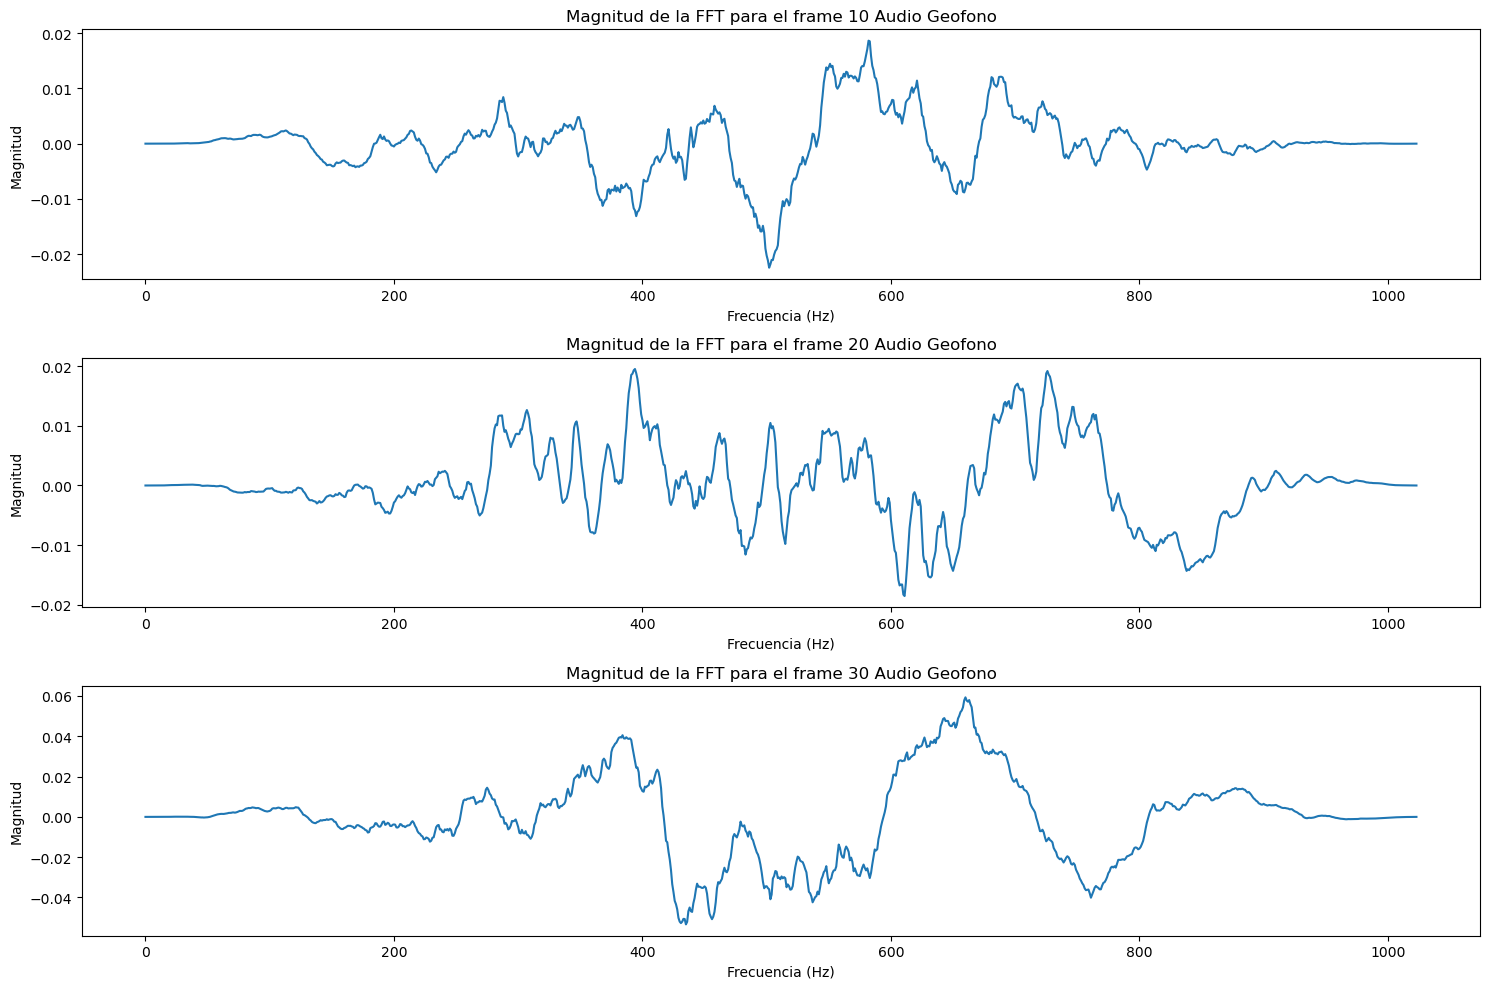

In [255]:
# Seleccionar algunos frames para graficar
frames_to_plot = [10, 20, 30]

plt.figure(figsize=(15, 10))

for i, frame in enumerate(frames_to_plot):
    plt.subplot(len(frames_to_plot), 1, i+1)
    plt.plot(geo_frames_ventana[frame])
    plt.title(f'Magnitud de la FFT para el frame {frame} Audio Geofono')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')

plt.tight_layout()
plt.show()

In [256]:
#Analizar audio a eleccion (Cancion)

#Cargar audio para tener referencia auditiva
from IPython.display import Audio

In [257]:
fs = 48000
seg=6

sig2, fs2 = lib.load('audios-tarea3/cancion.wav', sr=fs, duration=seg) 

In [258]:
Audio(data=sig2, rate=fs)

In [259]:
#Por lo tanto nuestra ruta del archivo de audio es el siguiente
ruta_cancion = 'audios-tarea3/cancion.wav'

# Cargar audio
cancion, fs = lib.load(ruta_cancion)

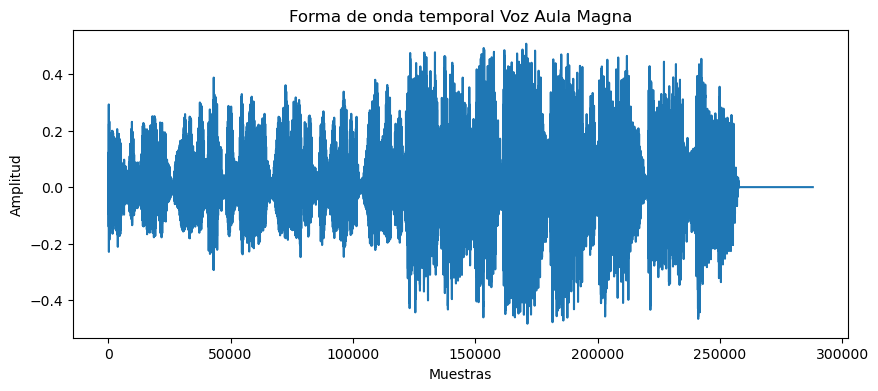

In [260]:
#Plantear la forma de onda temporal
plt.figure(figsize=(10, 4))
plt.plot(sig2)
plt.title('Forma de onda temporal Voz Aula Magna')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

Text(0, 0.5, 'Amplitud')

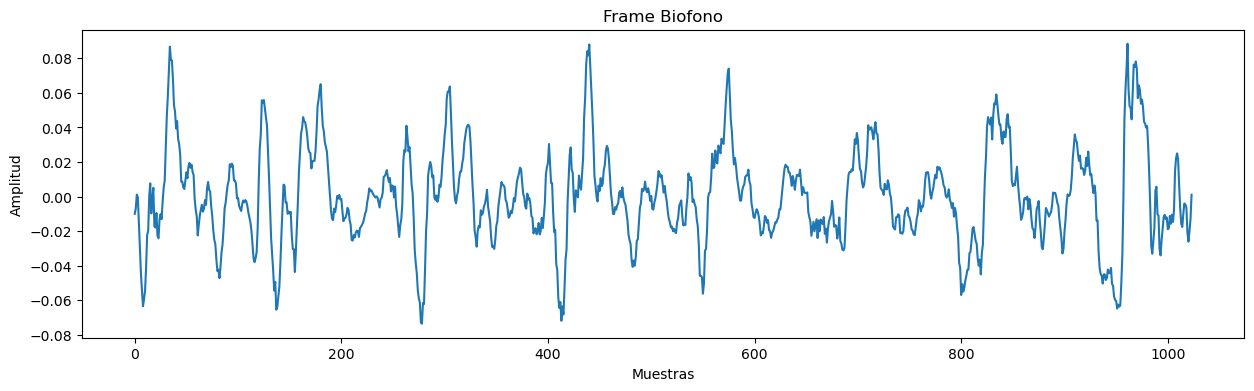

In [261]:
# Seleccionar un frame del audio

can_frames = ventanas(cancion, len_f, overlap)

# Graficar un frame del audio
plt.figure(figsize=(15, 4))

plt.plot(can_frames[10])
plt.title('Frame Biofono')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

In [262]:
# Aplicar FFT a todos los frames del audio Cancion
can_frames_ventana = can_frames * ventana
canfft_frames = np.apply_along_axis(fft, 1, can_frames_ventana)
canfft_frames = np.abs(canfft_frames)

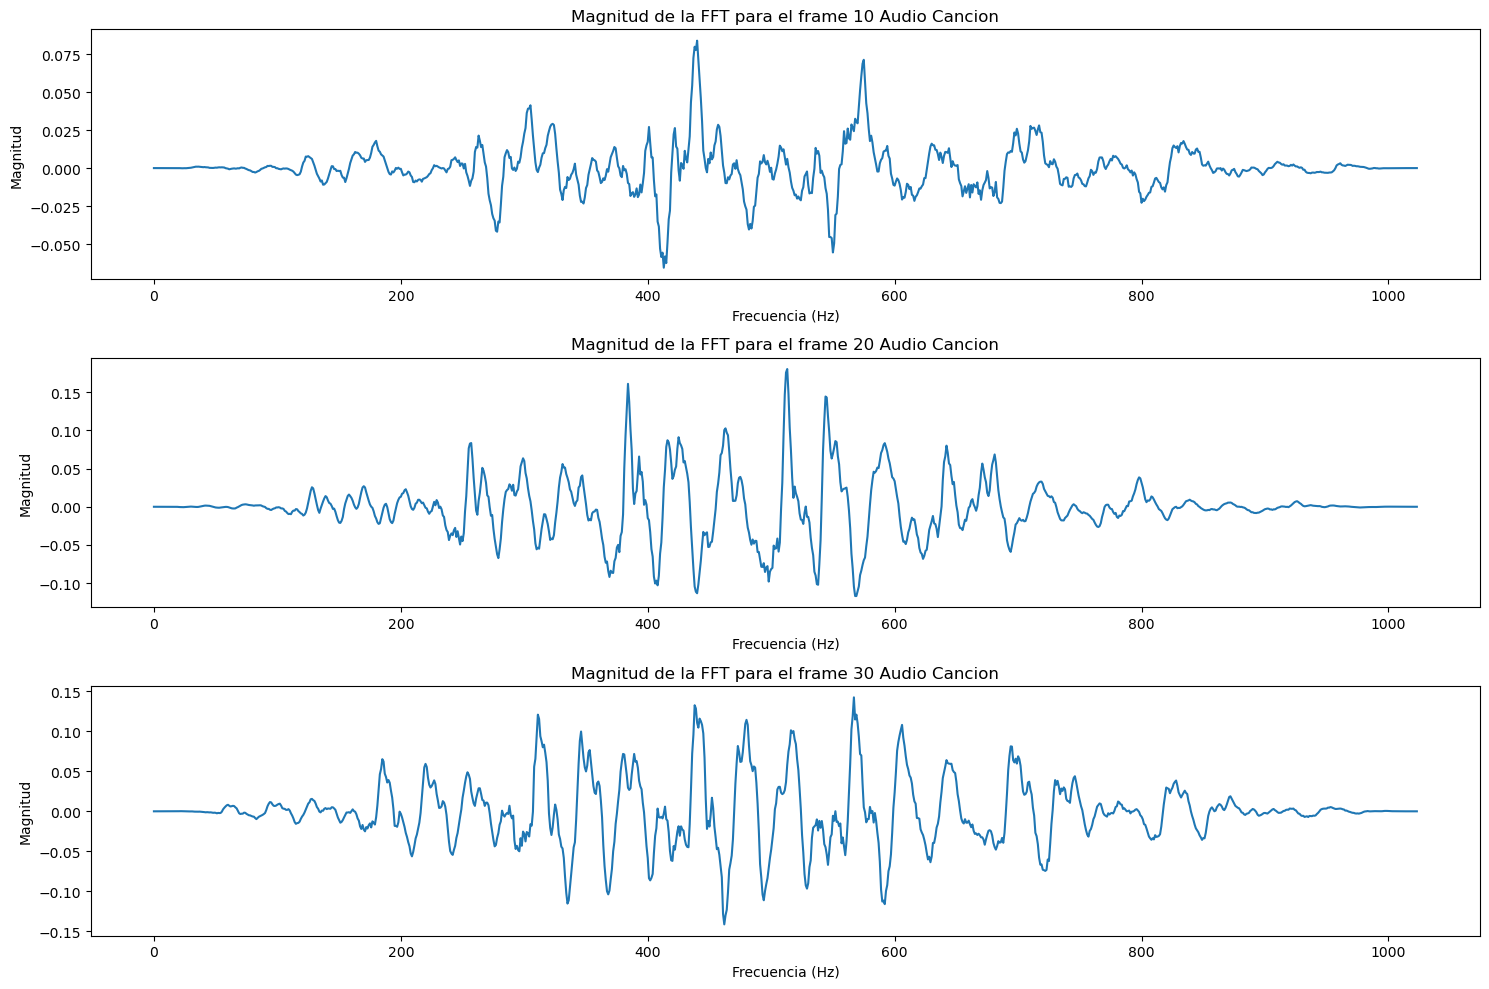

In [263]:
# Seleccionar algunos frames para graficar
frames_to_plot = [10, 20, 30]

plt.figure(figsize=(15, 10))

for i, frame in enumerate(frames_to_plot):
    plt.subplot(len(frames_to_plot), 1, i+1)
    plt.plot(can_frames_ventana[frame])
    plt.title(f'Magnitud de la FFT para el frame {frame} Audio Cancion')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud')

plt.tight_layout()
plt.show()